In [33]:
import pandas as pd
import numpy as np

In [34]:
ratings_1 = pd.read_csv("Metacritic/metacritic_games.csv")
ratings_2 = pd.read_csv("Metacritic/Metacritic-Game Releases by Score.csv")
sales = pd.read_csv("Sales/vgsales-12-4-2019-short.csv")

# Ratings

In [35]:
ratings_1["critic_count"] = ratings_1[["positive_critics","neutral_critics", "negative_critics"]].sum(axis=1)
ratings_1["users_count"] = ratings_1[["positive_users","neutral_users", "negative_users"]].sum(axis=1)
ratings_1 = ratings_1[["game","metascore","release_date","platform"]]

In [36]:
ratings_2["Rating"] = ratings_2["Rating"]*10
ratings_2.rename(columns={"Game_Title":"game", "Date":"release_date","Rating":"metascore","Platform":"platform"}, inplace=True)
ratings_2 = ratings_2[["game","metascore","release_date","platform"]]

In [37]:
common_games = list(set(ratings_1["game"]).intersection(ratings_2["game"]))
combined_ratings = pd.concat([ratings_1,ratings_2])

In [38]:
#combined_ratings[combined_ratings.duplicated(["game","platform"],keep=False)].sort_values("game")
combined_ratings.drop_duplicates(["game","platform"], inplace=True)

In [39]:
combined_ratings["date"] = pd.to_datetime(combined_ratings["release_date"])
combined_ratings

,game,metascore,release_date,platform,date
0,Portal 2,95.0,"Apr 18, 2011",PC,2011-04-18
1,The Elder Scrolls V: Skyrim,94.0,"Nov 10, 2011",PC,2011-11-10
2,The Legend of Zelda: Ocarina of Time 3D,94.0,"Jun 19, 2011",3DS,2011-06-19
3,Batman: Arkham City,91.0,"Nov 21, 2011",PC,2011-11-21
4,Super Mario 3D Land,90.0,"Nov 13, 2011",3DS,2011-11-13
...,...,...,...,...,...
16693,Metal Gear Survive,14.0,"February 20, 2018",PlayStation 4,2018-02-20
16694,Destiny 2: Curse of Osiris,14.0,"December 5, 2017",Xbox One,2017-12-05
16695,Ghostbusters,14.0,"July 12, 2016",PlayStation 4,2016-07-12
16696,Mindjack,14.0,"January 18, 2011",Xbox 360,2011-01-18


# Sales

In [40]:
sales[["Global_Sales","Total_Shipped"]] = sales[["Global_Sales","Total_Shipped"]].fillna(0)
sales["sales"] = sales[["Global_Sales","Total_Shipped"]].sum(axis=1)
sales.rename(columns={"Name":"game","Platform":"platform"}, inplace=True)
sales = sales[["game","platform","sales"]]

In [41]:
sales["sales"] = sales["sales"]*10**6

# Combine

In [42]:
sales = sales.groupby(["game"], as_index=False)["sales"].sum()

In [43]:
combined_ratings = combined_ratings.groupby(['game'], as_index=False).agg({'game': 'first', 'metascore': np.mean, "date":"first"})

In [44]:
combined =  pd.merge(sales,combined_ratings,on="game",how="inner")

<AxesSubplot:xlabel='sales', ylabel='metascore'>

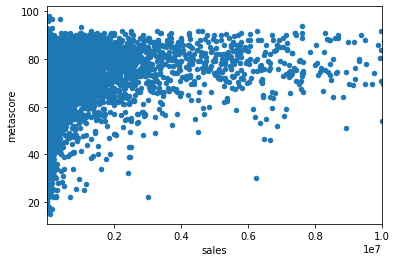

In [52]:
combined.plot("sales","metascore", kind="scatter", xlim=(2,10*10**6))

In [92]:
combined[["metascore","sales"]].corr()

,metascore,sales
metascore,1.000000,0.109035
sales,0.109035,1.000000


In [53]:
test= pd.read_csv("Kaggle\Video_Game_Sales_as_of_Jan_2017.csv")


<AxesSubplot:xlabel='Global_Sales', ylabel='Critic_Score'>

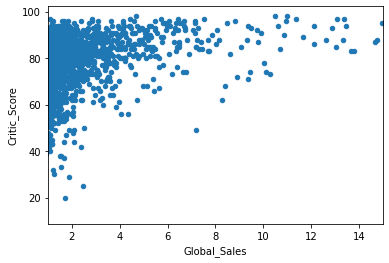

In [56]:
test.plot("Global_Sales","Critic_Score", kind="scatter", xlim=(1,15))

In [69]:
test_below_50 = test[test["Critic_Score"]<50].sort_values("Global_Sales", ascending=False)

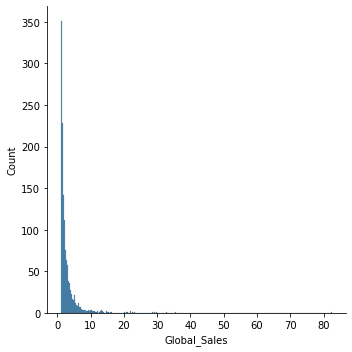

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
test_over_50 = test.loc[(test["Critic_Score"]>50) & (test["Global_Sales"]>1)].sort_values("Global_Sales", ascending=False)
test_over_50= test_over_50[test_over_50["Global_Sales"]>0]
sns.displot(test_over_50, x="Global_Sales")

In [91]:
test[["Global_Sales","Critic_Score"]].corr()

,Global_Sales,Critic_Score
Global_Sales,1.000000,0.245523
Critic_Score,0.245523,1.000000


In [95]:
test

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
